<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Pandasileeksikverileritemizleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

2. Yapay Veri Seti Oluşturma
Rastgele veri üretip içine eksik değerler (NaN) ekleyelim:

In [33]:
# Rastgele veri oluşturma
np.random.seed(42)  # Tekrarlanabilirlik için seed
data = {
    'Yaş': np.random.randint(20, 60, size=20),
    'Maaş': np.random.randint(3000, 10000, size=20),
    'Şehir': np.random.choice(['İstanbul', 'Ankara', 'İzmir', np.nan], size=20),
    'Cinsiyet': np.random.choice(['Erkek', 'Kadın', np.nan], size=20),
    'Puan': np.random.uniform(1, 10, size=20)
}

df = pd.DataFrame(data)

# Rastgele eksik veri ekleme (NaN)
df['Yaş'] = df['Yaş'].mask(np.random.random(size=20) < 0.2)  # %20 eksik
df['Maaş'] = df['Maaş'].mask(np.random.random(size=20) < 0.3)  # %30 eksik
df['Şehir'] = df['Şehir'].mask(np.random.random(size=20) < 0.25)  # %25 eksik
df['Puan'] = df['Puan'].mask(np.random.random(size=20) < 0.1)  # %10 eksik

3. Eksik Verileri Görüntüleme


👉 Oluşturulan Veri Seti:
    Yaş    Maaş   Şehir Cinsiyet      Puan
0  58.0     NaN  Ankara    Kadın  9.726262
1   NaN  8311.0     NaN    Erkek  7.976195
2   NaN  8051.0     nan    Kadın  9.455490
3  27.0  9420.0   İzmir    Erkek  9.053446
4  40.0  4184.0     nan    Kadın  6.381100

🔍 Eksik Veri Sayısı:
Yaş         5
Maaş        7
Şehir       5
Cinsiyet    0
Puan        2
dtype: int64


<Axes: >

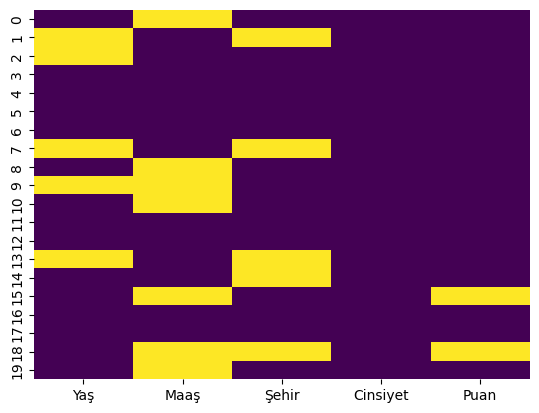

In [34]:
print("👉 Oluşturulan Veri Seti:")
print(df.head())  # İlk 5 satırı göster

print("\n🔍 Eksik Veri Sayısı:")
print(df.isnull().sum())

# Eksik veri haritası
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

4. Eksik Verileri Temizleme
Örnek 1: Eksik Satırları Silme

In [35]:
df_dropna = df.dropna()  # Tüm eksik satırları sil
print("🗑️ Eksik Satırlar Silindi:")
print(df_dropna.isnull().sum())

🗑️ Eksik Satırlar Silindi:
Yaş         0
Maaş        0
Şehir       0
Cinsiyet    0
Puan        0
dtype: int64


Örnek 2: Eksik Değerleri Doldurma



In [36]:
# Sayısal sütunları ortalama ile doldur
df_filled = df.fillna({
    'Yaş': df['Yaş'].mean(),
    'Maaş': df['Maaş'].mean(),
    'Puan': df['Puan'].mean()
})

# Kategorik sütunları mod ile doldur
df_filled['Şehir'] = df['Şehir'].fillna(df['Şehir'].mode()[0])
df_filled['Cinsiyet'] = df['Cinsiyet'].fillna(df['Cinsiyet'].mode()[0])

print("\n🔄 Doldurulmuş Veri Seti:")
print(df_filled.isnull().sum())


🔄 Doldurulmuş Veri Seti:
Yaş         0
Maaş        0
Şehir       0
Cinsiyet    0
Puan        0
dtype: int64


Örnek 3: İnterpolasyon (Zaman Serileri İçin)


In [10]:
df_sorted = df.sort_values(by='Yaş')  # Yaşa göre sırala (örnek amaçlı)
df_interpolated = df_sorted.interpolate()  # Lineer interpolasyon
print("\n📈 İnterpolasyon Sonrası:")
print(df_interpolated.isnull().sum())


📈 İnterpolasyon Sonrası:
Yaş         0
Maaş        0
Şehir       5
Cinsiyet    0
Puan        0
dtype: int64


<ipython-input-10-0108d69a1c86>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_sorted.interpolate()  # Lineer interpolasyon


In [11]:
df_filled.to_csv('temiz_veri.csv', index=False)
print("✅ Veri 'temiz_veri.csv' olarak kaydedildi!")

✅ Veri 'temiz_veri.csv' olarak kaydedildi!


1. Kategorik Verilerde Eksik Değer Yönetimi
Kategorik verilerde (örn. şehir, cinsiyet) eksik değerleri yönetmek için aşağıdaki yöntemleri kullanabilirsiniz:

a. Mod (En Sık Tekrar Eden Değer) ile Doldurma

In [28]:
import pandas as pd
import numpy as np

# Örnek kategorik veri seti
data = {
    'Şehir': ['İstanbul', 'Ankara', np.nan, 'İzmir', 'İstanbul', np.nan, 'Ankara'],
    'Cinsiyet': ['Erkek', np.nan, 'Kadın', 'Kadın', np.nan, 'Erkek', 'Kadın']
}
df = pd.DataFrame(data)

# Eksik değerleri mod ile doldurma
df['Şehir'] = df['Şehir'].fillna(df['Şehir'].mode()[0])  # En sık tekrar eden değer
df['Cinsiyet'] = df['Cinsiyet'].fillna('Bilinmiyor')      # Özel bir değerle doldurma

print("🔍 Kategorik Veri Temizliği Sonrası:")
print(df)

🔍 Kategorik Veri Temizliği Sonrası:
      Şehir    Cinsiyet
0  İstanbul       Erkek
1    Ankara  Bilinmiyor
2    Ankara       Kadın
3     İzmir       Kadın
4  İstanbul  Bilinmiyor
5    Ankara       Erkek
6    Ankara       Kadın


b. "Bilinmiyor" Gibi Özel Bir Değer Ekleme


In [21]:
# Eksik kategorik değerlere "Bilinmiyor" ekleme
df['Şehir'] = df['Şehir'].fillna('Bilinmiyor')
df['Cinsiyet'] = df['Cinsiyet'].fillna('Bilinmiyor')

c. Sütunu Tamamen Silme (Çok Yüksek Eksiklik Varsa)


In [14]:
df.drop(columns=['Şehir'], inplace=True)  # Şehir sütununu sil

2. Zaman Serisi Verilerinde İnterpolasyon Detayları
Zaman serilerinde eksik değerleri doldurmak için interpolasyon yöntemleri kullanılır. İşte en yaygın yöntemler:

a. Lineer İnterpolasyon

In [22]:
# Zaman serisi örneği
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
data = {
    'Tarih': dates,
    'Sıcaklık': [22, np.nan, 24, np.nan, np.nan, 28, 29, 30, np.nan, 32]
}
df_time = pd.DataFrame(data).set_index('Tarih')

# Lineer interpolasyon
df_interpolated = df_time.interpolate(method='linear')  # Varsayılan yöntem

print("📈 Lineer İnterpolasyon Sonrası:")
print(df_interpolated)

📈 Lineer İnterpolasyon Sonrası:
             Sıcaklık
Tarih                
2023-01-01  22.000000
2023-01-02  23.000000
2023-01-03  24.000000
2023-01-04  25.333333
2023-01-05  26.666667
2023-01-06  28.000000
2023-01-07  29.000000
2023-01-08  30.000000
2023-01-09  31.000000
2023-01-10  32.000000


b. Zaman Bazlı İnterpolasyon


In [23]:
df_time = df_time.interpolate(method='time')  # Tarih aralıklarına göre uyarlanmış interpolasyon

c. Polinom İnterpolasyonu


In [24]:
df_time = df_time.interpolate(method='polynomial', order=2)  # 2. dereceden polinom

3. Eksik Veriye "Bilinmiyor" Gibi Özel Değerler Ekleme
Hem sayısal hem kategorik verilerde özel değerlerle eksiklikleri işaretleyebilirsiniz.

a. Kategorik Verilerde

In [25]:
# "Bilinmiyor" ekleme
df['Şehir'] = df['Şehir'].fillna('Bilinmiyor')

b. Sayısal Verilerde


In [37]:
# Eksik değerlere -999 gibi bir işaret koyma
df['Yaş'] = df['Yaş'].fillna(-999)

c. Koşullu Değer Atama


In [ ]:
# Yaş > 50 ise "Bilinmiyor", değilse ortalama ile doldur
df['Yaş'] = np.where(
    df['Yaş'].isnull() & (df['Diğer_Sütun'] > 50),
    'Bilinmiyor',
    df['Yaş'].fillna(df['Yaş'].mean())
)

4. Tüm Senaryoları Birleştiren Örnek Kod


In [39]:
import pandas as pd
import numpy as np

# Örnek veri seti oluşturma
data = {
    'Tarih': pd.date_range(start='2023-01-01', periods=10),
    'Sıcaklık': [22, np.nan, 24, np.nan, np.nan, 28, 29, 30, np.nan, 32],
    'Şehir': ['İstanbul', np.nan, 'Ankara', np.nan, 'İzmir', 'İstanbul', np.nan, 'Ankara', 'İstanbul', np.nan],
    'Satış': [100, 120, np.nan, np.nan, 150, 160, 170, np.nan, 180, 200]
}
df = pd.DataFrame(data)

# 1. Kategorik verileri "Bilinmiyor" ile doldur
df['Şehir'] = df['Şehir'].fillna('Bilinmiyor')

# 2. Zaman serisi interpolasyonu (Lineer)
df['Sıcaklık'] = df['Sıcaklık'].interpolate(method='linear')

# 3. Sayısal verileri -999 ile işaretle
df['Satış'] = df['Satış'].fillna(-999)

print("✅ Tüm Temizlik Sonrası Veri Seti:")
print(df)

✅ Tüm Temizlik Sonrası Veri Seti:
       Tarih   Sıcaklık       Şehir  Satış
0 2023-01-01  22.000000    İstanbul  100.0
1 2023-01-02  23.000000  Bilinmiyor  120.0
2 2023-01-03  24.000000      Ankara -999.0
3 2023-01-04  25.333333  Bilinmiyor -999.0
4 2023-01-05  26.666667       İzmir  150.0
5 2023-01-06  28.000000    İstanbul  160.0
6 2023-01-07  29.000000  Bilinmiyor  170.0
7 2023-01-08  30.000000      Ankara -999.0
8 2023-01-09  31.000000    İstanbul  180.0
9 2023-01-10  32.000000  Bilinmiyor  200.0


Ne Zaman Hangi Yöntemi Kullanmalı?
Senaryo	Yöntem
Kategorik veri eksikliği	fillna("Bilinmiyor") veya mode()
Zaman serisi eksikliği	interpolate(method='time')
Sayısal veri eksikliği	fillna(mean()) veya interpolasyon
Yüksek eksik veri oranı	Sütunu sil (drop)